<a href="https://colab.research.google.com/github/psssmanoj026/fmmlmanojlabs/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

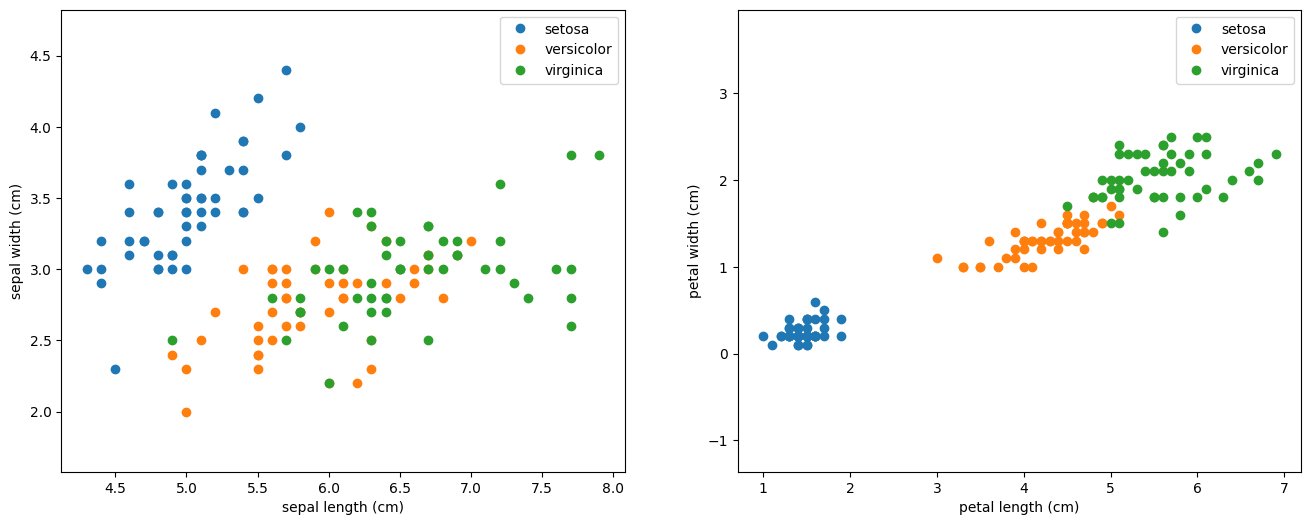

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 200.20it/s]


# Plot training progress

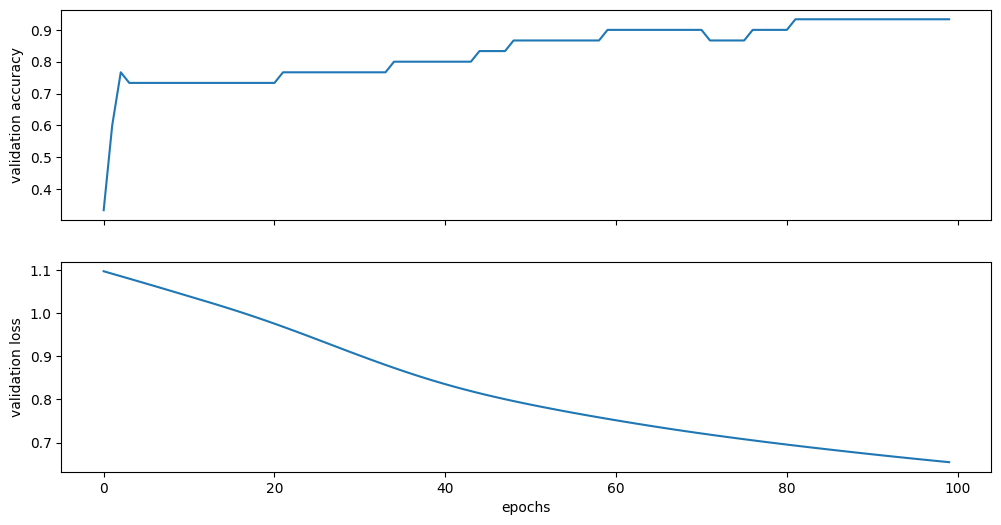

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a function to create a neural network with a specified number of hidden layers
def create_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))  # Assuming input shape of 28x28 for simplicity

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))  # 128 neurons with ReLU activation

    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons for classification

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create neural networks with different numbers of hidden layers
model_1_hidden_layer = create_model(1)  # One hidden layer
model_2_hidden_layers = create_model(2)  # Two hidden layers
model_3_hidden_layers = create_model(3)  # Three hidden layers

# Display model architectures
model_1_hidden_layer.summary()
model_2_hidden_layers.summary()
model_3_hidden_layers.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                            

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a function to create a neural network with a specified number of neurons in the hidden layers
def create_model(num_hidden_layers, num_neurons):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))  # Assuming input shape of 28x28 for simplicity

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(num_neurons, activation='relu'))  # Custom number of neurons with ReLU activation

    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons for classification

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create neural networks with different numbers of neurons in the hidden layers
model_1_hidden_layer_64_neurons = create_model(1, 64)  # One hidden layer with 64 neurons
model_2_hidden_layers_128_neurons = create_model(2, 128)  # Two hidden layers with 128 neurons
model_3_hidden_layers_256_neurons = create_model(3, 256)  # Three hidden layers with 256 neurons

# Display model architectures
model_1_hidden_layer_64_neurons.summary()
model_2_hidden_layers_128_neurons.summary()
model_3_hidden_layers_256_neurons.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                            

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a function to create a neural network with a specified activation function for the hidden layers
def create_model(num_hidden_layers, num_neurons, activation_func):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))  # Assuming input shape of 28x28 for simplicity

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(num_neurons, activation=activation_func))  # Custom activation function

    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons for classification

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create neural networks with different activation functions for the hidden layers
model_1_hidden_layer_tanh = create_model(1, 64, 'tanh')  # One hidden layer with tanh activation
model_2_hidden_layers_sigmoid = create_model(2, 128, 'sigmoid')  # Two hidden layers with sigmoid activation
model_3_hidden_layers_elu = create_model(3, 256, 'elu')  # Three hidden layers with ELU activation

# Display model architectures
model_1_hidden_layer_tanh.summary()
model_2_hidden_layers_sigmoid.summary()
model_3_hidden_layers_elu.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                            